# Paper_Classifier_3

### Label이 기타(2)인 데이터의 Label을 0으로 바꿔서 학습시킨 모델

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
# 인공신경망
from sklearn.neural_network import MLPClassifier
# 의사결정나무
from sklearn.tree import DecisionTreeClassifier
# 랜덤포레스트, 그래디언트 부스팅
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier,HistGradientBoostingClassifier
from xgboost import XGBClassifier
# 그리드 서치
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix,recall_score,precision_score,classification_report
import time
import datetime
import pickle
import sys
import os
matplotlib.rc('font',family='Malgun Gothic')

# 데이터 불러오기

In [9]:
# filepath 입력
filepath = "/home/piai/test/Big_Data_분석_기초/제지공장 프로젝트/data/정제데이터/reg_data/sp_5__inter_60__rm_60.csv"
# filepath = "/home/piai/test/Big_Data_분석_기초/제지공장 프로젝트/data/정제데이터/reg_data/sp_{}__inter_{}__rm_{}.csv".format(args[1],args[2]args[3])
# 레이블 칼럼명 입력
label_col= "result"

In [12]:
df = pd.read_csv(filepath,index_col="Unnamed: 0")

In [13]:
df.head()

,TAG_001,TAG_002,TAG_003,TAG_004,TAG_005,TAG_006,TAG_007,TAG_008,TAG_009,TAG_010,...,TAG_189,TAG_190,TAG_191,TAG_192,TAG_193,TAG_194,TAG_195,TAG_196,datetime,result
0,14.999063,3.629781,0.0,3.638315,150.217660,0.0,0.0,0.0,NaN,0.0,...,0.099781,0.505541,0.032922,0.0,81.529178,NaN,51.839729,NaN,2020-12-31 15:04:00,0
1,14.999614,3.649098,0.0,3.638153,150.303943,0.0,0.0,0.0,NaN,0.0,...,0.099871,0.505636,0.032981,0.0,81.465968,NaN,51.847774,NaN,2020-12-31 15:09:00,0
2,15.000166,3.649446,0.0,3.637990,150.390225,0.0,0.0,0.0,NaN,0.0,...,0.099961,0.505732,0.033040,0.0,81.199753,NaN,51.855819,NaN,2020-12-31 15:14:00,0
3,15.000717,3.651337,0.0,3.637828,150.476508,0.0,0.0,0.0,NaN,0.0,...,0.100051,0.505828,0.033098,0.0,81.421531,NaN,51.863863,NaN,2020-12-31 15:19:00,0
4,15.001268,3.653228,0.0,3.637665,150.562791,0.0,0.0,0.0,NaN,0.0,...,0.100141,0.505923,0.033157,0.0,81.423317,NaN,51.871908,NaN,2020-12-31 15:24:00,0


In [14]:
df[label_col].value_counts()

0     96247
29      217
28      216
27      216
16      215
17      215
26      215
24      215
23      215
22      215
21      215
20      215
19      215
18      215
15      215
14      215
13      215
12      215
11      215
10      215
9       215
4       215
1       214
3       214
8       214
7       214
25      214
6       214
5       214
2       214
Name: result, dtype: int64

In [16]:
col_num = "003 010 019 036 039 051 055 061 081 082 083 091 092 093 094 095 096 097 098 117 118 121 124 125 126 173 176 196".split(' ')

In [17]:
col_num = ["TAG_{}".format(num) if len(col_num[0])==3 else num for num in col_num ]

In [18]:
df_drop = df.drop([*col_num],axis=1)

In [9]:
# df_drop.loc[(df_drop[label_col]==2),label_col]=0
# df_droped=df_drop
# df_drop.loc[(df_drop[label_col]==0)]
# df_droped[label_col].value_counts()

In [19]:
df_drop.fillna(df_drop.mean(),inplace=True)

/tmp/ipykernel_18285/140142058.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_drop.fillna(df_drop.mean(),inplace=True)


In [25]:
df_x = df_drop.drop([label_col,"datetime"],axis=1,inplace=False)
df_y = df_drop[label_col]

In [26]:
df_train_x,df_test_x, df_train_y, df_test_y = train_test_split(df_x,df_y,test_size=0.3,random_state=1234)

In [27]:
df_test_y.value_counts()

0     28856
27       82
12       80
5        75
22       75
29       74
2        72
18       71
14       68
1        68
3        68
25       66
11       66
26       64
13       64
23       63
4        63
24       62
7        62
10       62
15       62
16       61
28       61
9        59
17       59
8        58
21       56
19       56
20       56
6        55
Name: result, dtype: int64

In [28]:
df_train_y.value_counts()

0     67391
20      159
19      159
6       159
21      159
9       156
8       156
17      156
28      155
16      154
24      153
15      153
10      153
23      152
7       152
4       152
13      151
26      151
11      149
25      148
14      147
1       146
3       146
18      144
29      143
2       142
22      140
5       139
12      135
27      134
Name: result, dtype: int64

raw_data

In [29]:
# df_raw = pd.read_csv("/home/piai/test/Big_Data_분석_기초/제지공장 프로젝트/data/원본데이터/pivot_df_y.csv",index_col="Unnamed: 0")

# df_raw.index=pd.to_datetime(df_raw.index)

# df_raw.fillna(df_raw.mean(),inplace=True)

# df_raw_drop = df_raw.drop([*col_num],axis=1)

# df_raw_x = df_raw_drop.drop(label_col,axis=1,inplace=False)
# df_raw_y = df_raw_drop[label_col]

# minutes = datetime.timedelta(minutes=30)

# df_info = pd.read_csv("/home/piai/test/Big_Data_분석_기초/제지공장 프로젝트/data/원본데이터/03_중지리스트.csv")

# # start_date, end_date를 datetime 데이터형으로 변경
# df_info["start_date"],df_info["end_date"]= list(map(pd.to_datetime,[df_info["start_date"],df_info["end_date"]]))
# # df_info를 start_date 기준으로 오름차순.
# df_info.sort_values("start_date",inplace=True)

# 모델링

각 모델에서 필요한 파라미터

In [30]:
para_leaf=[n_leaf * 1 for n_leaf in range(1,21)]
para_split=[n_split * 2 for n_split in range(1,21)]
para_depth=[depth for depth in range(2,11)]
para_n_tree=[n_tree*1 for n_tree in range(1,11)]
para_lr=[n_lr *0.1 for n_lr in range(1,11)]

## ANN

In [31]:
start = time.time()
rand_ann = MLPClassifier(random_state=1234, hidden_layer_sizes=(20, 20),activation="relu")
rand_ann.fit(df_train_x,df_train_y)

MLPClassifier(hidden_layer_sizes=(20, 20), random_state=1234)

In [32]:
print("소요시간 :", time.time() - start)

소요시간 : 121.7381706237793


In [33]:
ann_result = rand_ann
print("Score on training set  {:.3f}".format(rand_ann.score(df_train_x, df_train_y)))
print("Score on testing set  {:.3f}".format(rand_ann.score(df_test_x, df_test_y)))

Score on training set  0.939
Score on testing set  0.939


## DT

In [34]:
start = time.time()
estimator = DecisionTreeClassifier(random_state=1234)
param_rand={
            "max_depth":para_depth,
            "min_samples_split":para_split,
            "min_samples_leaf":para_leaf,
#             "n_estimators":para_n_tree,
#             "learning_rate":para_lr
           }
rand_dt = RandomizedSearchCV(estimator, param_rand, n_iter = 5, cv = 3, scoring="f1_micro", n_jobs=-1,verbose=0)
rand_dt.fit(df_train_x,df_train_y)

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=1234),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15, 16,
                                                             17, 18, 19, 20],
                                        'min_samples_split': [2, 4, 6, 8, 10,
                                                              12, 14, 16, 18,
                                                              20, 22, 24, 26,
                                                              28, 30, 32, 34,
                                                              36, 38, 40]},
                   scoring='f1_micro')

In [35]:
print("소요시간 :", time.time() - start)

소요시간 : 32.01981449127197


In [36]:
best_dt = rand_dt.best_estimator_
best_dt

DecisionTreeClassifier(max_depth=3, min_samples_leaf=8, min_samples_split=30,
                       random_state=1234)

In [37]:
dt_result = best_dt.fit(df_train_x,df_train_y)
print("Score on training set  {:.3f}".format(best_dt.score(df_train_x, df_train_y)))
print("Score on testing set  {:.3f}".format(best_dt.score(df_test_x, df_test_y)))

Score on training set  0.939
Score on testing set  0.939


## RF

In [38]:
start = time.time()
estimator = RandomForestClassifier(random_state=1234)
param_rand={
            "max_depth":para_depth,
            "min_samples_split":para_split,
            "min_samples_leaf":para_leaf,
            "n_estimators":para_n_tree,
#             "learning_rate":para_lr
           }
rand_rf = RandomizedSearchCV(estimator, param_rand, n_iter = 5, cv = 3, scoring="f1_micro", n_jobs=-1,verbose=0)
rand_rf.fit(df_train_x,df_train_y)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1234),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15, 16,
                                                             17, 18, 19, 20],
                                        'min_samples_split': [2, 4, 6, 8, 10,
                                                              12, 14, 16, 18,
                                                              20, 22, 24, 26,
                                                              28, 30, 32, 34,
                                                              36, 38, 40],
                                        'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10]},
                   scoring='f1_micro')

In [39]:
print("소요시간 :", time.time() - start)

소요시간 : 12.479092836380005


In [40]:
best_rf = rand_rf.best_estimator_
best_rf

RandomForestClassifier(max_depth=9, min_samples_leaf=20, min_samples_split=34,
                       n_estimators=9, random_state=1234)

In [41]:
rf_result = best_rf.fit(df_train_x,df_train_y)
print("Score on training set  {:.3f}".format(best_rf.score(df_train_x, df_train_y)))
print("Score on testing set  {:.3f}".format(best_rf.score(df_test_x, df_test_y)))

Score on training set  0.939
Score on testing set  0.939


## GB

In [42]:
start = time.time()
estimator = GradientBoostingClassifier(random_state=1234)
param_rand={
            "max_depth":para_depth,
            "min_samples_split":para_split,
            "min_samples_leaf":para_leaf,
            "n_estimators":para_n_tree,
            "learning_rate":para_lr
           }
rand_gb = RandomizedSearchCV(estimator, param_rand, n_iter = 5, cv = 3, scoring="f1_micro", n_jobs=-1,verbose=0)
rand_gb.fit(df_train_x,df_train_y)

RandomizedSearchCV(cv=3,
                   estimator=GradientBoostingClassifier(random_state=1234),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.2,
                                                          0.30000000000000004,
                                                          0.4, 0.5,
                                                          0.6000000000000001,
                                                          0.7000000000000001,
                                                          0.8, 0.9, 1.0],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15, 16,
                                                             17, 18, 19, 20],
                                        'min_samples_split': [2, 4, 6, 8, 10,
                                                              12, 14, 16, 18,
                                                              20, 22, 24, 26,
                                                              28, 30, 32, 34,
                                                              36, 38, 40],
                                        'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10]},
                   scoring='f1_micro')

In [43]:
print("소요시간 :", time.time() - start)

소요시간 : 1275.5615298748016


In [44]:
best_gb = rand_gb.best_estimator_
best_gb

GradientBoostingClassifier(learning_rate=0.4, min_samples_leaf=4,
                           min_samples_split=40, n_estimators=2,
                           random_state=1234)

In [45]:
gb_result = best_gb.fit(df_train_x,df_train_y)
print("Score on training set  {:.3f}".format(best_gb.score(df_train_x, df_train_y)))
print("Score on testing set  {:.3f}".format(best_gb.score(df_test_x, df_test_y)))

Score on training set  0.937
Score on testing set  0.933


## HGB

In [46]:
start = time.time()
estimator = HistGradientBoostingClassifier(random_state=1234)
param_rand={
            "max_depth":para_depth,
#             "min_samples_split":para_split,
            "min_samples_leaf":para_leaf,
#             "n_estimators":para_n_tree,
            "learning_rate":para_lr
           }
rand_hgb = RandomizedSearchCV(estimator, param_rand, n_iter = 5, cv = 3, scoring="recall_micro", n_jobs=-1,verbose=0)
rand_hgb.fit(df_train_x,df_train_y)

RandomizedSearchCV(cv=3,
                   estimator=HistGradientBoostingClassifier(random_state=1234),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.2,
                                                          0.30000000000000004,
                                                          0.4, 0.5,
                                                          0.6000000000000001,
                                                          0.7000000000000001,
                                                          0.8, 0.9, 1.0],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15, 16,
                                                             17, 18, 19, 20]},
                   scoring='recall_micro')

In [47]:
print("소요시간 :", time.time() - start)

소요시간 : 37.389052867889404


In [48]:
best_hgb = rand_hgb.best_estimator_
best_hgb

HistGradientBoostingClassifier(learning_rate=0.2, max_depth=2,
                               min_samples_leaf=11, random_state=1234)

In [49]:
hgb_result = best_hgb.fit(df_train_x,df_train_y)
print("Score on training set  {:.3f}".format(best_hgb.score(df_train_x, df_train_y)))
print("Score on testing set  {:.3f}".format(best_hgb.score(df_test_x, df_test_y)))

Score on training set  0.937
Score on testing set  0.933


## XGB

In [50]:
start = time.time()

In [51]:
estimator = XGBClassifier(random_state=1234,use_missing=False)
param_rand={
            "learning_rate":para_lr,    
            "max_depth":para_depth,
            "n_estimators":para_n_tree
           }
rand_xgb = RandomizedSearchCV(estimator, param_rand, n_iter = 5, cv = 3, scoring="f1_micro", n_jobs=-1,verbose=0)
rand_xgb.fit(df_train_x,df_train_y)

[20:11:11] WARNING: ../src/learner.cc:627: 
Parameters: { "use_missing" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=1234,
                                           reg_alpha=None, reg_lambda=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.2,
                                                          0.30000000000000004,
                                                          0.4, 0.5,
                                                          0.6000000000000001,
                                                          0.7000000000000001,
                                                          0.8, 0.9, 1.0],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10]},
                   scoring='f1_micro')

In [52]:
print("소요시간 :", time.time() - start)

소요시간 : 462.0976815223694


In [53]:
best_xgb = rand_xgb.best_estimator_
best_xgb

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.6000000000000001, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=2, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=1234,
              reg_alpha=0, ...)

In [54]:
xgb_result = best_xgb.fit(df_train_x,df_train_y)
print("Score on training set  {:.3f}".format(best_xgb.score(df_train_x, df_train_y)))
print("Score on testing set  {:.3f}".format(best_xgb.score(df_test_x, df_test_y)))

[20:11:16] WARNING: ../src/learner.cc:627: 
Parameters: { "use_missing" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Score on training set  0.939
Score on testing set  0.939


# 학습된 모델 저장

In [102]:
# 모델 저장
path = "./trained_model/sp_{}_inter_{}_rm_{}".format(sp,inter,rm)
cmd = "mkdir {}".format(path)
os.system(cmd)
# 모델 스코어저장
# path = "./trained_model/sp_{}_inter_{}_rm_{}".format(sp,inter,rm)
# cmd = "mkdir {}".format(path)
# os.system(cmd)

mkdir: `./trained_model/sp_5_inter_60_rm_60' 디렉토리를 만들 수 없습니다: 파일이 있습니다
mkdir: `./trained_model/sp_5_inter_60_rm_60' 디렉토리를 만들 수 없습니다: 파일이 있습니다


256

In [103]:
# ann
trained_file = "{}/{}_{}_{}_{}.pickle".format(path,"ann",sp,inter,rm)
with open(trained_file,'wb') as fw:
    pickle.dump(rand_ann, fw)

# rf
trained_file = "{}/{}_{}_{}_{}.pickle".format(path,"rf",sp,inter,rm)
with open(trained_file,'wb') as fw:
    pickle.dump(rand_rf, fw)

# gb
trained_file = "{}/{}_{}_{}_{}.pickle".format(path,"gb",sp,inter,rm)
with open(trained_file,'wb') as fw:
    pickle.dump(rand_gb, fw)

# hgb
trained_file = "{}/{}_{}_{}_{}.pickle".format(path,"hgb",sp,inter,rm)
with open(trained_file,'wb') as fw:
    pickle.dump(rand_hgb, fw)

# xgb
trained_file = "{}/{}_{}_{}_{}.pickle".format(path,"xgb",sp,inter,rm)
with open(trained_file,'wb') as fw:
    pickle.dump(rand_xgb, fw)

In [112]:
ann_y_pred = ann_result.predict(df_test_x)
dt_y_pred = dt_result.predict(df_test_x)
rf_y_pred = rf_result.predict(df_test_x)
gb_y_pred = gb_result.predict(df_test_x)
hgb_y_pred = hgb_result.predict(df_test_x)
xgb_y_pred = xgb_result.predict(df_test_x)

In [113]:
models=['ANN','DT','GB','RF','XGB','HGB']
model_score=["{}:\n{}\n{}\n".format(i,classification_report(df_test_y,globals()["{}_y_pred".format(i.lower())]),"="*len("              precision    recall  f1-score   support")) for i in models]
print(*model_score)
# trained_file = "{}/{}_{}_{}_{}.txt
# with open()

ANN:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     28856
           1       0.00      0.00      0.00        68
           2       0.00      0.00      0.00        72
           3       0.00      0.00      0.00        68
           4       0.00      0.00      0.00        63
           5       0.00      0.00      0.00        75
           6       0.00      0.00      0.00        55
           7       0.00      0.00      0.00        62
           8       0.00      0.00      0.00        58
           9       0.00      0.00      0.00        59
          10       0.00      0.00      0.00        62
          11       0.00      0.00      0.00        66
          12       0.00      0.00      0.00        80
          13       0.00      0.00      0.00        64
          14       0.00      0.00      0.00        68
          15       0.00      0.00      0.00        62
          16       0.00      0.00      0.00        61
          17       0.0

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/piai/anaconda3/lib/python3.9/si

# 변수 중요도

In [47]:
# 변수중요도 상위 몇 개?
top_importance = 5

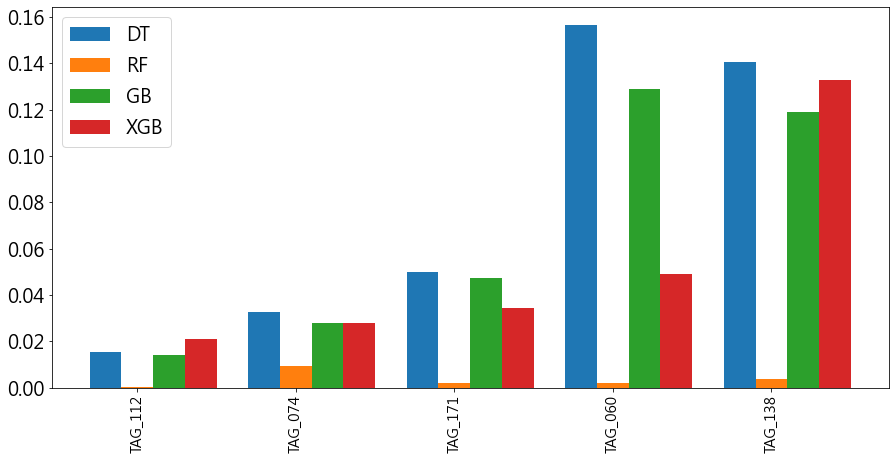

In [48]:
###### v_feature_name = df_train_x.columns
v_feature_name = df_train_x.columns
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
# df_importance["ANN_Importance"] = rand_ann.feature_importances_
df_importance["DT_Importance"] = best_dt.feature_importances_
df_importance["RF_Importance"] = best_rf.feature_importances_
df_importance["GB_Importance"] = best_gb.feature_importances_
df_importance["XGB_Importance"] = best_xgb.feature_importances_
df_importance.sort_values("XGB_Importance", ascending=True, inplace=True)
# coordinates_ann = [i for i in range(len(df_importance))]
coordinates_dt = [i for i in range(len(df_importance))]
coordinates_rf = [i+0.2 for i in range(len(df_importance))]
coordinates_gb = [i+0.4 for i in range(len(df_importance))]
coordinates_xgb = [i+0.6 for i in range(len(df_importance))]
plt.figure(figsize=(15,7))
plt.bar(x=coordinates_dt[-top_importance:], height=df_importance['DT_Importance'][-top_importance:],width=0.2,label="DT")
plt.bar(x=coordinates_rf[-top_importance:], height=df_importance['RF_Importance'][-top_importance:],width=0.2,label="RF")
plt.bar(x=coordinates_gb[-top_importance:], height=df_importance['GB_Importance'][-top_importance:],width=0.2,label="GB")
plt.bar(x=coordinates_xgb[-top_importance:], height=df_importance['XGB_Importance'][-top_importance:],width=0.2,label="XGB")
plt.legend(fontsize=20)
# plt.title("모델별 변수 중요도 - ALL Data",fontsize=20)
plt.xticks(coordinates_rf[-top_importance:],df_importance['Feature'][-top_importance:],rotation=90,fontsize=15)
plt.yticks(fontsize=20)
# plt.ylabel("변수 중요도",fontsize=15)
# plt.xlabel("변수",fontsize=15)
plt.savefig("./feature_importance.png")
plt.show()

In [49]:
[df_train_x.columns,best_xgb.feature_importances_.round(3)]

[Index(['TAG_001', 'TAG_002', 'TAG_004', 'TAG_005', 'TAG_006', 'TAG_007',
        'TAG_008', 'TAG_009', 'TAG_011', 'TAG_012',
        ...
        'TAG_186', 'TAG_187', 'TAG_188', 'TAG_189', 'TAG_190', 'TAG_191',
        'TAG_192', 'TAG_193', 'TAG_194', 'TAG_195'],
       dtype='object', length=168),
 array([0.002, 0.004, 0.006, 0.005, 0.011, 0.002, 0.   , 0.001, 0.   ,
        0.004, 0.011, 0.005, 0.012, 0.004, 0.002, 0.   , 0.   , 0.001,
        0.   , 0.   , 0.003, 0.001, 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.009, 0.005, 0.001, 0.   , 0.   , 0.002, 0.005, 0.01 , 0.006,
        0.002, 0.007, 0.007, 0.008, 0.002, 0.005, 0.005, 0.   , 0.003,
        0.005, 0.   , 0.003, 0.004, 0.   , 0.006, 0.005, 0.049, 0.004,
        0.001, 0.004, 0.01 , 0.002, 0.   , 0.002, 0.004, 0.   , 0.018,
        0.004, 0.001, 0.028, 0.003, 0.   , 0.002, 0.004, 0.001, 0.011,
        0.01 , 0.002, 0.009, 0.005, 0.005, 0.005, 0.005, 0.004, 0.005,
        0.001, 0.003, 0.005, 0.011, 0.02 , 0.001, 0.004, 0.0

In [50]:
print("DT  :",*sorted(zip(df_train_x.columns,best_dt.feature_importances_.round(3)),key=lambda x:x[1],reverse=True)[:10])

print("RF  :",*sorted(zip(df_train_x.columns,best_rf.feature_importances_.round(3)),key=lambda x:x[1],reverse=True)[:10])

print("GB  :",*sorted(zip(df_train_x.columns,best_gb.feature_importances_.round(3)),key=lambda x:x[1],reverse=True)[:10])

print("XGB :",*sorted(zip(df_train_x.columns,best_xgb.feature_importances_.round(3)),key=lambda x:x[1],reverse=True)[:10])

DT  : ('TAG_060', 0.156) ('TAG_138', 0.141) ('TAG_071', 0.055) ('TAG_171', 0.05) ('TAG_105', 0.042) ('TAG_161', 0.039) ('TAG_074', 0.033) ('TAG_160', 0.033) ('TAG_136', 0.029) ('TAG_120', 0.025)
RF  : ('TAG_071', 0.087) ('TAG_041', 0.085) ('TAG_132', 0.051) ('TAG_105', 0.039) ('TAG_170', 0.039) ('TAG_089', 0.033) ('TAG_165', 0.031) ('TAG_114', 0.026) ('TAG_028', 0.024) ('TAG_179', 0.024)
GB  : ('TAG_060', 0.129) ('TAG_138', 0.119) ('TAG_171', 0.047) ('TAG_071', 0.046) ('TAG_105', 0.034) ('TAG_161', 0.033) ('TAG_013', 0.029) ('TAG_074', 0.028) ('TAG_160', 0.028) ('TAG_136', 0.026)
XGB : ('TAG_138', 0.133) ('TAG_060', 0.049) ('TAG_171', 0.034) ('TAG_074', 0.028) ('TAG_112', 0.021) ('TAG_105', 0.02) ('TAG_071', 0.018) ('TAG_132', 0.017) ('TAG_188', 0.014) ('TAG_136', 0.013)


# 모델 성능

### ANN

In [52]:
ann_y_pred = ann_result.predict(df_test_x)
print("Confusion Matrix:\n{}\n".format(confusion_matrix(df_test_y,ann_y_pred)))

Confusion Matrix:
[[30347   286]
 [  781  1446]]



In [53]:
f1_score(df_test_y,ann_y_pred)

0.730487496842637

In [54]:
accuracy_score(df_test_y,ann_y_pred)

0.9675289105295192

In [55]:
recall_score(df_test_y,ann_y_pred)

0.6493039964077234

In [56]:
print(classification_report(df_test_y,ann_y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     30633
           1       0.83      0.65      0.73      2227

    accuracy                           0.97     32860
   macro avg       0.90      0.82      0.86     32860
weighted avg       0.97      0.97      0.97     32860



### DT

In [57]:
dt_y_pred = dt_result.predict(df_test_x)
print("Confusion Matrix:\n{}\n".format(confusion_matrix(df_test_y,dt_y_pred)))

Confusion Matrix:
[[30335   298]
 [  595  1632]]



In [58]:
f1_score(df_test_y,dt_y_pred)

0.7851816213615589

In [59]:
accuracy_score(df_test_y,dt_y_pred)

0.9728241022519781

In [60]:
recall_score(df_test_y,dt_y_pred)

0.732824427480916

In [61]:
print(classification_report(df_test_y,dt_y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     30633
           1       0.85      0.73      0.79      2227

    accuracy                           0.97     32860
   macro avg       0.91      0.86      0.89     32860
weighted avg       0.97      0.97      0.97     32860



### RF

In [62]:
rf_y_pred = rf_result.predict(df_test_x)
print("Confusion Matrix:\n{}\n".format(confusion_matrix(df_test_y,rf_y_pred)))

Confusion Matrix:
[[30514   119]
 [  757  1470]]



In [63]:
f1_score(df_test_y,rf_y_pred)

0.770440251572327

In [64]:
accuracy_score(df_test_y,rf_y_pred)

0.9733414485696896

In [65]:
recall_score(df_test_y,rf_y_pred)

0.6600808262236192

In [66]:
print(classification_report(df_test_y,rf_y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     30633
           1       0.93      0.66      0.77      2227

    accuracy                           0.97     32860
   macro avg       0.95      0.83      0.88     32860
weighted avg       0.97      0.97      0.97     32860



### GB

In [67]:
gb_y_pred = gb_result.predict(df_test_x)
print("Confusion Matrix:\n{}\n".format(confusion_matrix(df_test_y,gb_y_pred)))

Confusion Matrix:
[[30244   389]
 [  481  1746]]



In [68]:
f1_score(df_test_y,gb_y_pred)

0.8005502063273728

In [69]:
accuracy_score(df_test_y,gb_y_pred)

0.9735240413877054

In [70]:
recall_score(df_test_y,gb_y_pred)

0.7840143691064212

In [71]:
print(classification_report(df_test_y,gb_y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     30633
           1       0.82      0.78      0.80      2227

    accuracy                           0.97     32860
   macro avg       0.90      0.89      0.89     32860
weighted avg       0.97      0.97      0.97     32860



### HGB

In [72]:
hgb_y_pred = hgb_result.predict(df_test_x)
print("Confusion Matrix:\n{}\n".format(confusion_matrix(df_test_y,hgb_y_pred)))

Confusion Matrix:
[[30546    87]
 [  209  2018]]



In [73]:
f1_score(df_test_y,hgb_y_pred)

0.9316712834718374

In [74]:
accuracy_score(df_test_y,hgb_y_pred)

0.9909920876445526

In [75]:
recall_score(df_test_y,hgb_y_pred)

0.9061517736865738

In [76]:
print(classification_report(df_test_y,hgb_y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     30633
           1       0.96      0.91      0.93      2227

    accuracy                           0.99     32860
   macro avg       0.98      0.95      0.96     32860
weighted avg       0.99      0.99      0.99     32860



### XGB

In [91]:
xgb_y_pred = xgb_result.predict(df_test_x)
print("Confusion Matrix:\n{}\n".format(confusion_matrix(df_test_y,xgb_y_pred)))

Confusion Matrix:
[[28856     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [   68     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [   72     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [   68     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [   63     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [   75     0     0     0     0     0     0    

In [78]:
f1_score(df_test_y,xgb_y_pred)

0.8803378695448147

In [79]:
accuracy_score(df_test_y,xgb_y_pred)

0.984479610468655

In [80]:
recall_score(df_test_y,xgb_y_pred)

0.8423888639425235

In [81]:
print(classification_report(df_test_y,xgb_y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     30633
           1       0.92      0.84      0.88      2227

    accuracy                           0.98     32860
   macro avg       0.96      0.92      0.94     32860
weighted avg       0.98      0.98      0.98     32860



## 각 모델별 성능 비교

In [87]:
models=['ANN','DT','GB','RF','XGB','HGB']
precision,accuracy,recall,f1=[],[],[],[]

In [88]:
precision.append(precision_score(df_test_y,ann_y_pred))

accuracy.append(accuracy_score(df_test_y,ann_y_pred))

recall.append(recall_score(df_test_y,ann_y_pred))

f1.append(f1_score(df_test_y,ann_y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [30744, 102478]

In [89]:
precision.append(precision_score(df_test_y,dt_y_pred))

accuracy.append(accuracy_score(df_test_y,dt_y_pred))

recall.append(recall_score(df_test_y,dt_y_pred))

f1.append(f1_score(df_test_y,dt_y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [30744, 102478]

In [90]:
precision.append(precision_score(df_test_y,gb_y_pred))

accuracy.append(accuracy_score(df_test_y,gb_y_pred))

recall.append(recall_score(df_test_y,gb_y_pred))

f1.append(f1_score(df_test_y,gb_y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [30744, 102478]

In [86]:
precision.append(precision_score(df_test_y,rf_y_pred))

accuracy.append(accuracy_score(df_test_y,rf_y_pred))

recall.append(recall_score(df_test_y,rf_y_pred))

f1.append(f1_score(df_test_y,rf_y_pred))

In [87]:
precision.append(precision_score(df_test_y,xgb_y_pred))

accuracy.append(accuracy_score(df_test_y,xgb_y_pred))

recall.append(recall_score(df_test_y,xgb_y_pred))

f1.append(f1_score(df_test_y,xgb_y_pred))

In [88]:
precision.append(precision_score(df_test_y,hgb_y_pred))

accuracy.append(accuracy_score(df_test_y,hgb_y_pred))

recall.append(recall_score(df_test_y,hgb_y_pred))

f1.append(f1_score(df_test_y,hgb_y_pred))

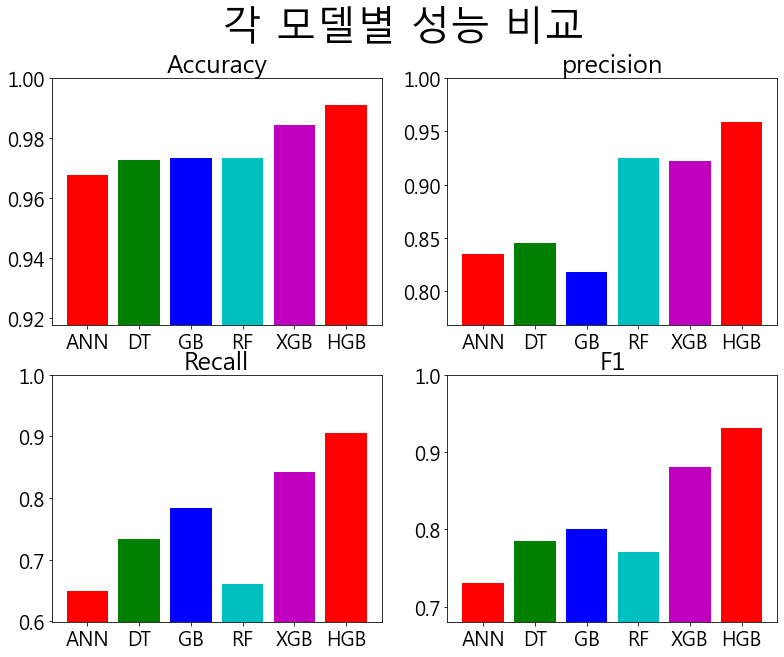

In [89]:
fig,ax=plt.subplots(2,2,figsize=(13,10))
colors=['r','g','b','c','m']
fig.suptitle("각 모델별 성능 비교",fontsize=40)

ax[0,0].bar(models,accuracy,color=colors)
ax[0,0].set_title("Accuracy",fontsize=25)
ax[0,0].set_ylim(bottom=min(accuracy)-0.05,top=1)
ax[0,0].tick_params(axis='x', labelsize=20)
ax[0,0].tick_params(axis='y', labelsize=20)

ax[0,1].bar(models,precision,color=colors)
ax[0,1].set_title("precision",fontsize=25)
ax[0,1].set_ylim(bottom=min(precision)-0.05,top=1)
ax[0,1].tick_params(axis='x', labelsize=20)
ax[0,1].tick_params(axis='y', labelsize=20)

ax[1,0].bar(models,recall,color=colors)
ax[1,0].set_title("Recall",fontsize=25)
ax[1,0].set_ylim(bottom=min(recall)-0.05,top=1)
ax[1,0].tick_params(axis='x', labelsize=20)
ax[1,0].tick_params(axis='y', labelsize=20)

ax[1,1].bar(models,f1,color=colors)
ax[1,1].set_title("F1",fontsize=25)
ax[1,1].set_ylim(bottom=min(f1)-0.05,top=1)
ax[1,1].tick_params(axis='x', labelsize=20)
ax[1,1].tick_params(axis='y', labelsize=20)

plt.savefig("./모델_성능.png")

In [60]:
print(*["{}:\n{}\n{}\n".format(i,classification_report(df_test_y,globals()["{}_y_pred".format(i.lower())]),"="*len("              precision    recall  f1-score   support")) for i in models])

ANN:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     28856
           1       0.00      0.00      0.00        68
           2       0.00      0.00      0.00        72
           3       0.00      0.00      0.00        68
           4       0.00      0.00      0.00        63
           5       0.00      0.00      0.00        75
           6       0.00      0.00      0.00        55
           7       0.00      0.00      0.00        62
           8       0.00      0.00      0.00        58
           9       0.00      0.00      0.00        59
          10       0.00      0.00      0.00        62
          11       0.00      0.00      0.00        66
          12       0.00      0.00      0.00        80
          13       0.00      0.00      0.00        64
          14       0.00      0.00      0.00        68
          15       0.00      0.00      0.00        62
          16       0.00      0.00      0.00        61
          17       0.0

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/piai/anaconda3/lib/python3.9/si

[20:03:34] WARNING: ../src/learner.cc:627: 
Parameters: { "use_missing" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:04:00] WARNING: ../src/learner.cc:627: 
Parameters: { "use_missing" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:05:10] WARNING: ../src/learner.cc:627: 
Parameters: { "use_missing" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
 

### plotting

In [ ]:
min1 = datetime.timedelta(minutes = 600)
min2 = datetime.timedelta(minutes = 1440)
start_temp = False
for start,end in zip(df_info[(df_info["cause"]=="불량중지")]["start_date"],df_info[(df_info["cause"]=="불량중지")]["end_date"]):
    if start_temp:
        if ((start_temp+min2)>start):
            continue
        n_diff = 2
        
        xgb_y_before_30 = xgb_result.predict_proba(df_raw_x.loc[((df_raw_x.index>=start-min1)&(df_raw_x.index<=start))])
        x_ind = df_raw_x.loc[((df_raw_x.index>=start-min1)&(df_raw_x.index<=start))].index
        y_ind = xgb_y_before_30[:,1]
        revised_y = (y_ind - np.roll(y_ind, n_diff))[n_diff:]
        revised_x = np.roll(np.array(x_ind), n_diff)[n_diff:]
        plt.plot(revised_x,revised_y) # 차분
#         plt.plot(x_ind,y_ind)
        plt.xticks(rotation=45)
        plt.ylim(0,1)
        plt.show()
    start_temp =end

In [ ]:
# np.roll(np.array([1,2,3,4,5]), 1)[1:]

In [ ]:
df_raw_predict = xgb_result.predict(df_raw_x)
df_raw_proba = xgb_result.predict_proba(df_raw_x)
print(float(df_raw_predict.sum())/len(df_raw_predict))
plt.plot(df_raw_x.index,df_raw_proba[:,1])

In [85]:
pivot_df

NameError: name 'pivot_df' is not defined